<img src='https://pandas.pydata.org/docs/_static/pandas.svg' width=500>

https://pandas.pydata.org/

Pandas data-manipulation capabilities are built on top of NumPy, utilizing its fast array processing, and its graphing capabilities are built on top of Matplotlib.

* "pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language."

* It may be one of the most widely used tools for data munging

  * present data in nice formats
  * multiple convenient methods for filtering data
  * work with a variety of data formats (CSV, Excel, …)
  * convenient functions for quickly plotting data

* The name comes from panel data (and is also a play on python data analysis)

Import the library:

In [1]:
import pandas as pd

Import the data:

In [2]:
dinodata = pd.read_csv('https://raw.githubusercontent.com/benjum/UCLA-24A6-DH140/main/data/DatasaurusDozen.csv')

Look at some data values:

In [3]:
dinodata

,dataset,x,y
0,dino,55.384600,97.179500
1,dino,51.538500,96.025600
2,dino,46.153800,94.487200
3,dino,42.820500,91.410300
4,dino,40.769200,88.333300
...,...,...,...
1841,wide_lines,33.674442,26.090490
1842,wide_lines,75.627255,37.128752
1843,wide_lines,40.610125,89.136240
1844,wide_lines,39.114366,96.481751


Making a scatter plot of the data in the `x` and `y` columns is easy:

<Axes: xlabel='x', ylabel='y'>

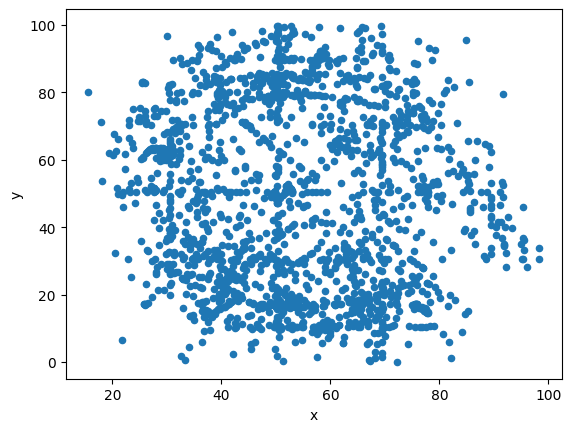

In [4]:
dinodata.plot(x = 'x', y = 'y', kind = 'scatter')

# What are we looking at?

The above command looks easy, but there's more to the data than this.

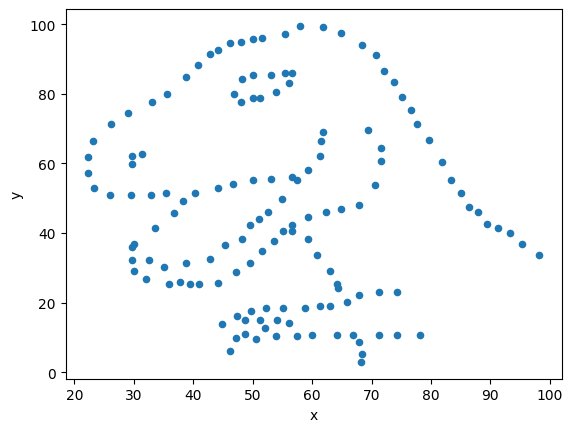

In [5]:
dinodata[dinodata['dataset']=='dino'].plot(x='x', y='y', kind='scatter');

## Basic data structures in Pandas

Python can store values in a variety of data structures: single variables, lists, dictionaries, sets, etc.  

Pandas has two key data structures for storing Python variables:

1. Series
    * 1D
    * Like an array
    * Items are labeled by an index
2. Dataframes
    * 2D
    * Like a spreadsheet
    * Items are labeled by an index (row label) and column name

`dinodata` is a dataframe:

In [6]:
dinodata

,dataset,x,y
0,dino,55.384600,97.179500
1,dino,51.538500,96.025600
2,dino,46.153800,94.487200
3,dino,42.820500,91.410300
4,dino,40.769200,88.333300
...,...,...,...
1841,wide_lines,33.674442,26.090490
1842,wide_lines,75.627255,37.128752
1843,wide_lines,40.610125,89.136240
1844,wide_lines,39.114366,96.481751


* `head(n)`: show us the first `n` rows (5 by default)
* `tail(n)`: show us the last `n` rows (5 by default)
* `info()` : a range of summary info

In [7]:
dinodata.head()

,dataset,x,y
0,dino,55.3846,97.1795
1,dino,51.5385,96.0256
2,dino,46.1538,94.4872
3,dino,42.8205,91.4103
4,dino,40.7692,88.3333


In [8]:
dinodata.tail()

,dataset,x,y
1841,wide_lines,33.674442,26.090490
1842,wide_lines,75.627255,37.128752
1843,wide_lines,40.610125,89.136240
1844,wide_lines,39.114366,96.481751
1845,wide_lines,34.583829,89.588902


In [9]:
dinodata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1846 entries, 0 to 1845
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  1846 non-null   object 
 1   x        1846 non-null   float64
 2   y        1846 non-null   float64
dtypes: float64(2), object(1)
memory usage: 43.4+ KB


There are several other useful dataframe attributes and methods that will allow you to get summary info:
* `columns` : column names
* `dtypes` : data types of the columns (dataframes can hold different datatypes in different columns)
* `index` : information about the row indices (they don't have to be numerical)
* `shape` : the size of the dataframe in each dimension
* `describe()` : basic statistics about the data columns

In [10]:
dinodata.columns

Index(['dataset', 'x', 'y'], dtype='object')

In [11]:
dinodata.dtypes

dataset     object
x          float64
y          float64
dtype: object

In [12]:
dinodata.index

RangeIndex(start=0, stop=1846, step=1)

In [13]:
dinodata.shape

(1846, 3)

In [14]:
dinodata.describe()

,x,y
count,1846.000000,1846.000000
mean,54.265695,47.835099
std,16.713001,26.847766
min,15.560750,0.015119
25%,41.073403,22.561073
50%,52.591269,47.594450
75%,67.277845,71.810778
max,98.288123,99.694680


In [15]:
dinodata.describe(include = 'all')

,dataset,x,y
count,1846,1846.000000,1846.000000
unique,13,NaN,NaN
top,dino,NaN,NaN
freq,142,NaN,NaN
mean,NaN,54.265695,47.835099
std,NaN,16.713001,26.847766
min,NaN,15.560750,0.015119
25%,NaN,41.073403,22.561073
50%,NaN,52.591269,47.594450
75%,NaN,67.277845,71.810778


If you select one of the columns of `dinodata` you'll get a Series in return:

In [16]:
dinodata['dataset']

0             dino
1             dino
2             dino
3             dino
4             dino
           ...    
1841    wide_lines
1842    wide_lines
1843    wide_lines
1844    wide_lines
1845    wide_lines
Name: dataset, Length: 1846, dtype: object

## Selecting data from a dataframe

If you have a dataframe `df` and want to look at a specific column `columnname`, use `df['columnname']`

In [17]:
dinodata['x']

0       55.384600
1       51.538500
2       46.153800
3       42.820500
4       40.769200
          ...    
1841    33.674442
1842    75.627255
1843    40.610125
1844    39.114366
1845    34.583829
Name: x, Length: 1846, dtype: float64

Dataframe can have both numerical- and label-based indices.  There is specific data retrieval syntax that accommodates this.

In [18]:
# This will give an error!
dinodata[0]

KeyError: 0

In [ ]:
# This will not give an error
dinodata[0:1]

It's best to stick with `loc` and `iloc` for the moment to index dataframes.
* `loc` : label-based indexing (which can look numerical if the row index is a number)
* `iloc` : numerical indexing

In [19]:
# the first row;
# return value is a Series

dinodata.loc[0]

dataset       dino
x          55.3846
y          97.1795
Name: 0, dtype: object

In [20]:
# the first row;
# return value is a Dataframe (note the index is [0])

dinodata.loc[[0]]

,dataset,x,y
0,dino,55.3846,97.1795


In [21]:
# the first two rows;
# return value is a Dataframe (the index is a list [0,1])

dinodata.loc[[0,1]]

,dataset,x,y
0,dino,55.3846,97.1795
1,dino,51.5385,96.0256


In [22]:
# indexing both the row and column

dinodata.loc[0,'x']

55.3846

In [23]:
# indexing both the row and column
# and returning a dataframe

dinodata.loc[[0],['x']]

,x
0,55.3846


In [24]:
# you can use lists for the indices

dinodata.loc[[0],['x','y']]

,x,y
0,55.3846,97.1795


In [25]:
dinodata.loc[[10],['x','y']]

,x,y
10,23.0769,66.4103


`iloc` is useful when you instead want to index numerically.

In [26]:
dinodata.iloc[0]

dataset       dino
x          55.3846
y          97.1795
Name: 0, dtype: object

Before you execute the below, try to predict whether it will return a Series or a Dataframe.

In [27]:
dinodata.iloc[1]

dataset       dino
x          51.5385
y          96.0256
Name: 1, dtype: object

In [28]:
dinodata.iloc[[1]]

,dataset,x,y
1,dino,51.5385,96.0256


In [29]:
dinodata.iloc[0:1]

,dataset,x,y
0,dino,55.3846,97.1795


In [30]:
dinodata.iloc[0:4]

,dataset,x,y
0,dino,55.3846,97.1795
1,dino,51.5385,96.0256
2,dino,46.1538,94.4872
3,dino,42.8205,91.4103


In [31]:
# this will give an error! you can't use a label-based index like 'x' with iloc

dinodata.iloc[0:4,'x']

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

In [ ]:
# instead of referncing the column with 'x'
# iloc indexes it numerically

dinodata.iloc[0:4, 1]

In [32]:
dinodata.iloc[[0,1,2,3],[1]]

,x
0,55.3846
1,51.5385
2,46.1538
3,42.8205


In [33]:
dinodata.iloc[0,0]

'dino'

In [34]:
dinodata.loc[0,'dataset']

'dino'

## What's the data for 'dataset' == 'dino'?  Boolean indexing

It is useful to be able to get elements where certain conditions are true.

Like here, we may want to get only those rows that are part of the 'dino' dataset.

This can be accomplished with boolean indexing, where the index is a True/False condition, and there is one such value for every row.

The following sets up the boolean series of True/False values for every row.

In [35]:
dinodata['dataset'] == 'dino'

0        True
1        True
2        True
3        True
4        True
        ...  
1841    False
1842    False
1843    False
1844    False
1845    False
Name: dataset, Length: 1846, dtype: bool

We can use that as the index to dinodata, i.e., for any dataframe `df` we can use `df[condition]` to get only those rows where `condition` is True

In [36]:
dinodata[dinodata['dataset'] == 'dino']

,dataset,x,y
0,dino,55.3846,97.1795
1,dino,51.5385,96.0256
2,dino,46.1538,94.4872
3,dino,42.8205,91.4103
4,dino,40.7692,88.3333
...,...,...,...
137,dino,39.4872,25.3846
138,dino,91.2821,41.5385
139,dino,50.0000,95.7692
140,dino,47.9487,95.0000


Boolean indexing also works as the index when using `loc`

In [37]:
dinodata.loc[dinodata['dataset'] == 'dino']

,dataset,x,y
0,dino,55.3846,97.1795
1,dino,51.5385,96.0256
2,dino,46.1538,94.4872
3,dino,42.8205,91.4103
4,dino,40.7692,88.3333
...,...,...,...
137,dino,39.4872,25.3846
138,dino,91.2821,41.5385
139,dino,50.0000,95.7692
140,dino,47.9487,95.0000


In [38]:
dinodata.loc[dinodata['dataset'] == 'circle']

,dataset,x,y
1136,circle,55.993030,79.277264
1137,circle,50.032254,79.013071
1138,circle,51.288459,82.435940
1139,circle,51.170537,79.165294
1140,circle,44.377915,78.164628
...,...,...,...
1273,circle,39.921363,19.701850
1274,circle,84.794278,55.568650
1275,circle,55.662959,83.356480
1276,circle,50.492248,78.997532


Note above what happens to the indices.  You should keep in mind this behavior if you want to index the returned result.

In [39]:
dinodata.loc[dinodata['dataset'] == 'dino','x']

0      55.3846
1      51.5385
2      46.1538
3      42.8205
4      40.7692
        ...   
137    39.4872
138    91.2821
139    50.0000
140    47.9487
141    44.1026
Name: x, Length: 142, dtype: float64

In [40]:
dinodata['dataset'].str.startswith('d')

0        True
1        True
2        True
3        True
4        True
        ...  
1841    False
1842    False
1843    False
1844    False
1845    False
Name: dataset, Length: 1846, dtype: bool

In [41]:
dinodata.loc[dinodata['dataset'].str.startswith('d')]

,dataset,x,y
0,dino,55.384600,97.179500
1,dino,51.538500,96.025600
2,dino,46.153800,94.487200
3,dino,42.820500,91.410300
4,dino,40.769200,88.333300
...,...,...,...
1131,dots,50.533635,17.019581
1132,dots,77.500907,50.166986
1133,dots,50.691124,87.513960
1134,dots,49.990395,83.997357


In [42]:
dinodata.loc[dinodata['dataset'].str.contains('in')]

,dataset,x,y
0,dino,55.384600,97.179500
1,dino,51.538500,96.025600
2,dino,46.153800,94.487200
3,dino,42.820500,91.410300
4,dino,40.769200,88.333300
...,...,...,...
1841,wide_lines,33.674442,26.090490
1842,wide_lines,75.627255,37.128752
1843,wide_lines,40.610125,89.136240
1844,wide_lines,39.114366,96.481751


Dataframes have many very useful methods.

... which we will ignore for the moment until next week when we get to exploratory data analysis.

For now:  plotting!

## Plotting

Let's make a scatter plot with only the `dino` dataset

In [43]:
# How do we get that subset of data?

a = dinodata[dinodata['dataset'] == 'dino']

Make a plot:

<Axes: xlabel='x'>

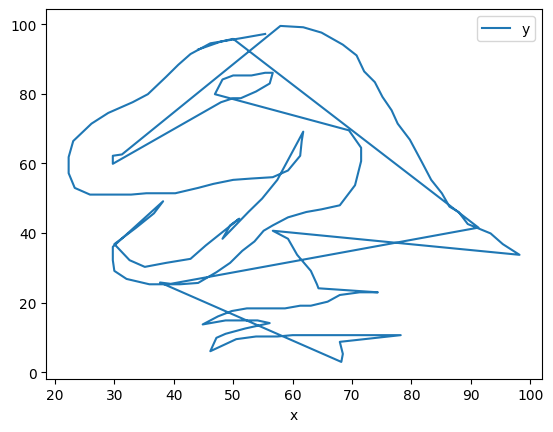

In [44]:
a.plot(x='x', y='y')

What's with the zig-zags?

By default, pandas will make a line plot connecting the points, and since the points are plotted out of numerical order, the connecting lines zigs back and forth in the x and y direction.

We actually want to plot this as a scatter plot instead of a line plot.

<Axes: xlabel='x', ylabel='y'>

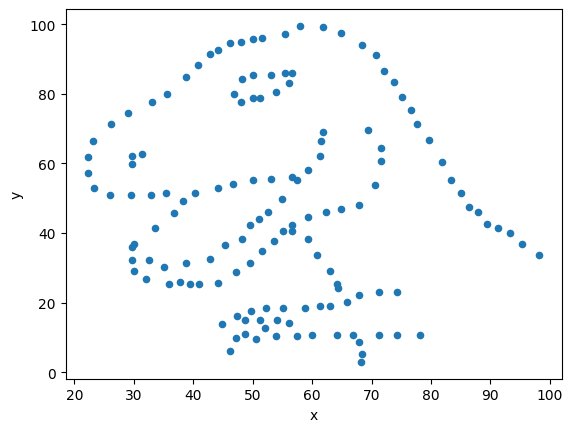

In [45]:
a.plot(x='x', y='y', kind='scatter')

The `kind` parameter makes it very easy to make a variety of different elementary plots:

* `line` : line plot
* `bar` : vertical bar plot
* `barh` : horizontal bar plot
* `hist` : histogram
* `box` : boxplot
* `kde` : kernel density estimation plot
* `density` : same as kde
* `area` : area plot
* `pie` : pie plot
* `scatter` : scatter plot
* `hexbin` : hexbin plot

<Axes: xlabel='x'>

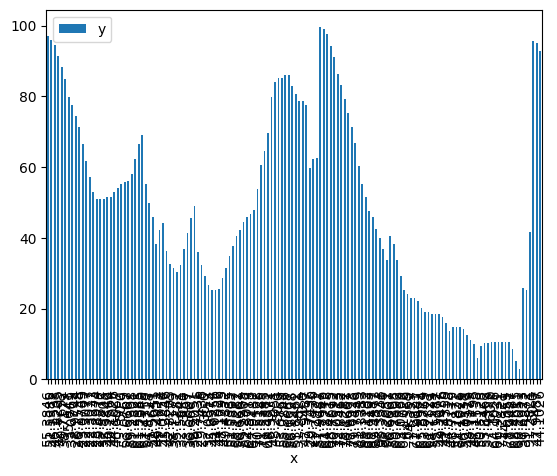

In [46]:
a.plot(x='x', y='y', kind='bar')

This, of course, doesn't mean that you don't have to think about what you want to plot before-hand.

To make things easier, let's look at a subset of data:

In [47]:
b = a[0:15]

In [48]:
b

,dataset,x,y
0,dino,55.3846,97.1795
1,dino,51.5385,96.0256
2,dino,46.1538,94.4872
3,dino,42.8205,91.4103
4,dino,40.7692,88.3333
5,dino,38.7179,84.8718
6,dino,35.6410,79.8718
7,dino,33.0769,77.5641
8,dino,28.9744,74.4872
9,dino,26.1538,71.4103


<Axes: xlabel='x'>

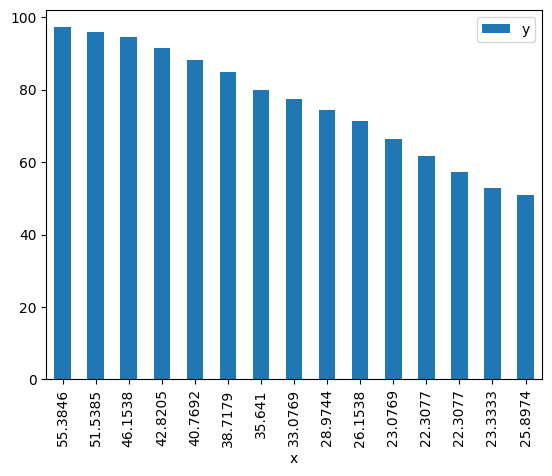

In [49]:
b.plot(x='x', y='y', kind='bar')

Note that pandas does not necessarily try to order the x-axis here for us.

In [50]:
b.sort_values(by='x')

,dataset,x,y
12,dino,22.3077,57.1795
11,dino,22.3077,61.7949
10,dino,23.0769,66.4103
13,dino,23.3333,52.9487
14,dino,25.8974,51.0256
9,dino,26.1538,71.4103
8,dino,28.9744,74.4872
7,dino,33.0769,77.5641
6,dino,35.6410,79.8718
5,dino,38.7179,84.8718


<Axes: >

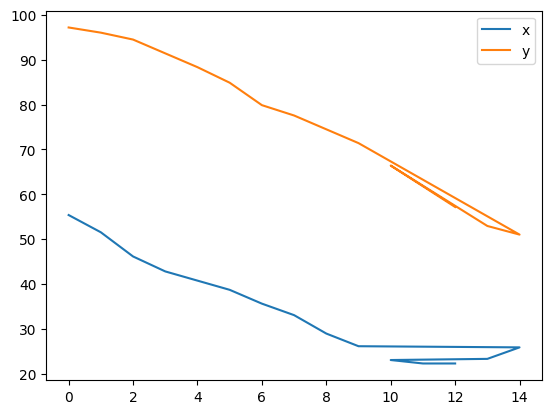

In [51]:
b.sort_values(by='x').plot()

<Axes: xlabel='x'>

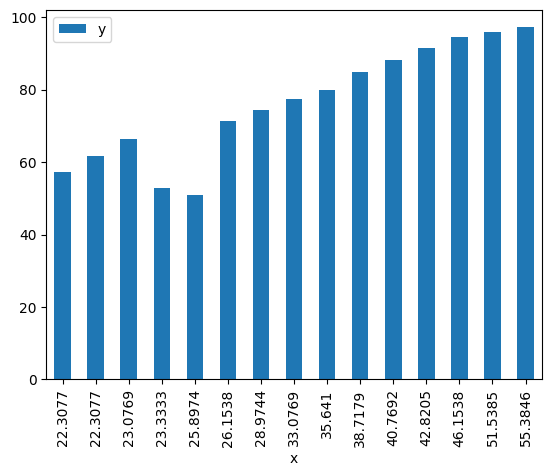

In [52]:
b.sort_values(by='x').plot(x='x', y='y', kind='bar')

<Axes: ylabel='x'>

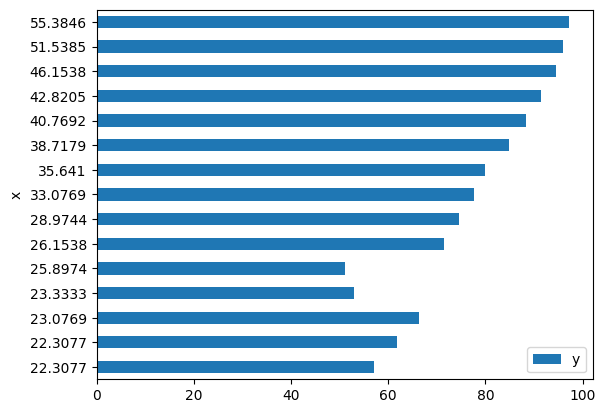

In [53]:
b.sort_values(by='x').plot(x='x', y='y', kind='barh')

<Axes: xlabel='x', ylabel='y'>

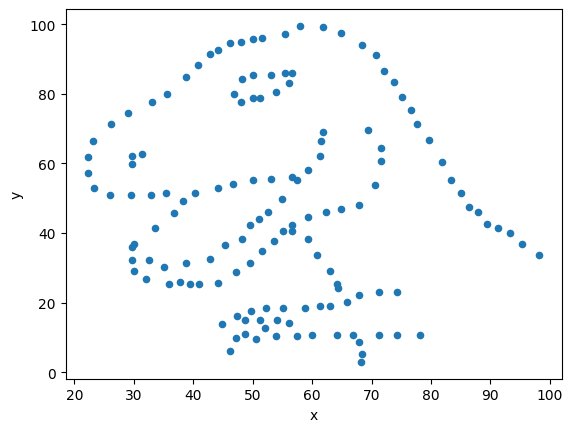

In [54]:
a.plot(x='x',
       y='y',
       kind='scatter')

<Axes: xlabel='x', ylabel='y'>

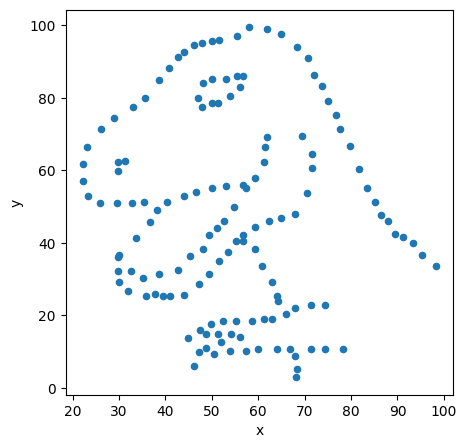

In [55]:
a.plot(x='x',
       y='y',
       kind='scatter',
       figsize=(5,5))

<Axes: xlabel='hdata', ylabel='vdata'>

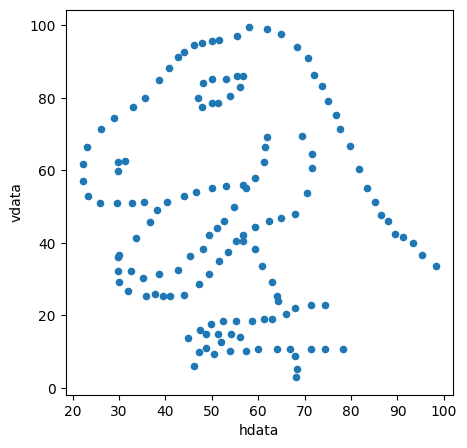

In [56]:
a.plot(x='x',
       y='y',
       kind='scatter',
       figsize=(5,5),
       xlabel='hdata',
       ylabel='vdata')

<Axes: xlabel='hdata', ylabel='vdata'>

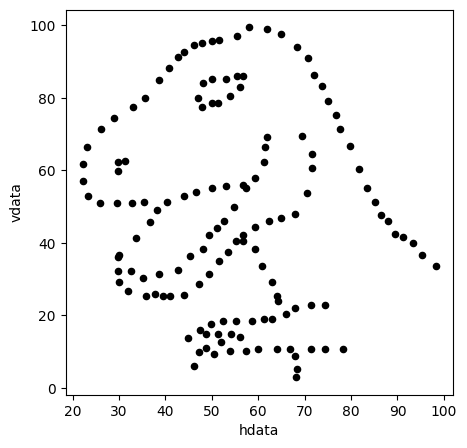

In [57]:
a.plot(x='x',
       y='y',
       kind='scatter',
       figsize=(5,5),
       xlabel='hdata',
       ylabel='vdata',
       color='black')

<Axes: xlabel='hdata', ylabel='vdata'>

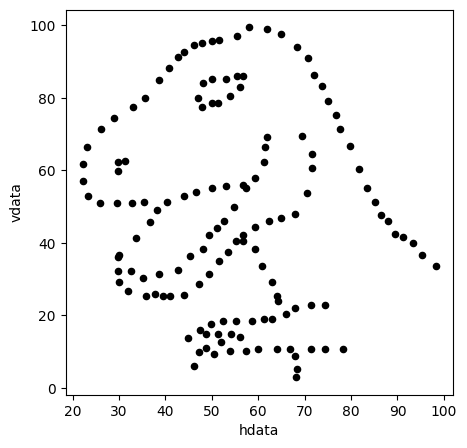

In [58]:
dinodata[dinodata['dataset']=='dino'].plot(x='x',
       y='y',
       kind='scatter',
       figsize=(5,5),
       xlabel='hdata',
       ylabel='vdata',
       color='black')

What datasets can we look at?

In [59]:
dinodata['dataset'].unique()

array(['dino', 'away', 'h_lines', 'v_lines', 'x_shape', 'star',
       'high_lines', 'dots', 'circle', 'bullseye', 'slant_up',
       'slant_down', 'wide_lines'], dtype=object)

In [60]:
datasets = dinodata['dataset'].unique()

v_lines


<Axes: xlabel='hdata', ylabel='vdata'>

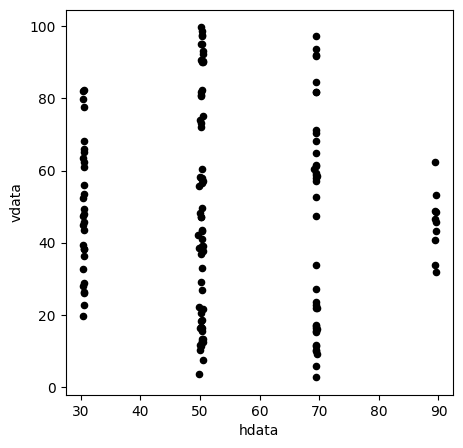

In [61]:
d2plot = 3

print(datasets[d2plot])

dinodata[dinodata['dataset'] == datasets[d2plot]].plot(x='x',
       y='y',
       kind='scatter',
       figsize=(5,5),
       xlabel='hdata',
       ylabel='vdata',
       color='black')

## Brief hint of fun stuff to come

In [62]:
import matplotlib.pyplot as plt
import ipywidgets

In [63]:
def dinoplot(dataset):
    fig,ax = plt.subplots(2,2,figsize=(12,12))
    dinodata[dinodata['dataset']==dataset].plot(x='y',
           y='x',
           kind='hist',
           figsize=(5,5),
           xlabel='hdata',
           ylabel='vdata',
           color='black', ax=ax[0,0])
    dinodata[dinodata['dataset']==dataset].plot(x='x',
           y='y',
           kind='scatter',
           figsize=(5,5),
           xlabel='hdata',
           ylabel='vdata',
           color='black', ax=ax[1,0])
    ax[0,1].text(0.25,0.8,'x_mean = {:.2f}'.format(dinodata.loc[dinodata['dataset']==dataset,'x'].mean()))
    ax[0,1].text(0.25,0.6,'y_mean = {:.2f}'.format(dinodata.loc[dinodata['dataset']==dataset,'y'].mean()))
    ax[0,1].text(0.25,0.4,'x_stddev = {:.2f}'.format(dinodata.loc[dinodata['dataset']==dataset,'x'].std()))
    ax[0,1].text(0.25,0.2,'y_stddev = {:.2f}'.format(dinodata.loc[dinodata['dataset']==dataset,'y'].std()))
    dinodata[dinodata['dataset']==dataset].plot(x='x',
           y='y',
           kind='hist',
           figsize=(5,5),
           xlabel='hdata',
           ylabel='vdata',
           color='black', ax=ax[1,1])
    
ipywidgets.interact(dinoplot,dataset=datasets)

interactive(children=(Dropdown(description='dataset', options=('dino', 'away', 'h_lines', 'v_lines', 'x_shape'…

<function __main__.dinoplot(dataset)>